# <h1 align='center'>PREDICTION OF CUSTOMER BEHAVIOUR</h1>

# Outline 
(Click on any part of the work flow to jump straight to that section of the notebook)
- <a href='#0' style='text-decoration:none'>0. Business Problem / Objective</a>
    - <a href='#0.1' style='text-decoration:none'>0.1 Importing Libraries</a>
    
    
- <a href='#1' style='text-decoration:none'>1. Data Overview</a>
    - <a href='#1.1' style='text-decoration:none'>1.1. Data preperation</a>
        - <a href='#1.1.1' style='text-decoration:none'>1.1.1 Dealing with missing values</a>
    - <a href='#1.2' style='text-decoration:none'>1.2. Descriptive Statistics</a>
        - <a href='#1.2.1' style='text-decoration:none'>1.2.1 Measures of Variability</a>
        - <a href='#1.2.2' style='text-decoration:none'>1.2.2 Measures of Central tendency</a>
    
   
- <a href='#2' style='text-decoration:none'>2. Exploratory Data Analysis</a>
    - <a href='#2.1' style='text-decoration:none'>2.1. Analysing Customer Churn</a>
    - <a href='#2.2' style='text-decoration:none'>2.2. Analysing Categorical Variables</a>
        - <a href='#2.2.1' style='text-decoration:none'>2.2.1. Analysing Demographics</a>
        - <a href='#2.2.2' style='text-decoration:none'>2.2.2. Analysing Choice of serice and payment information</a>
        - <a href='#2.2.3' style='text-decoration:none'>2.2.3. Analysing Churn reason</a>
    - <a href='#2.3' style='text-decoration:none'>2.3. Analysing Numerical Variables</a>
    - <a href='#2.4' style='text-decoration:none'>2.4. Dealing with Outliers</a>
    - <a href='#2.5' style='text-decoration:none'>2.5. Collinearity in Numerical Variables</a>
    
    
- <a href='#3' style='text-decoration:none'>3. Data preprocessing</a>
    - <a href='#3.1' style='text-decoration:none'>3.1. One-Hot Encoding</a>
    - <a href='#3.2' style='text-decoration:none'>3.2. Feature Selection</a>
        - <a href='#3.2.1' style='text-decoration:none'>3.2.1. Accounting For Collinearity</a>
        - <a href='#3.2.2' style='text-decoration:none'>3.2.2. Accounting For Collinearity excluding Churn score</a>
        - <a href='#3.2.3' style='text-decoration:none'>3.2.3. Ignoring multicolinearity and using all features</a>
    - <a href='#3.3' style='text-decoration:none'>3.3. Feature Scaling</a>
    
    
- <a href='#4' style='text-decoration:none'>4. Model Building</a>
    - <a href='#4.2' style='text-decoration:none'>4.1 Baseline Model Method</a>
    - <a href='#4.2' style='text-decoration:none'>4.2. Logistic Regression</a>
        - <a href='#4.2.1' style='text-decoration:none'>4.2.1. Logistic regression model accounting for collinearity</a>
        - <a href='#4.2.2' style='text-decoration:none'>4.2.2. Logistic regression data accounting for collinearity without churn Score</a>
        - <a href='#4.2.3' style='text-decoration:none'>4.2.3. Logistic regression model without accounting for collinearity</a>
    - <a href='#4.3' style='text-decoration:none'>4.3. Random Forest</a>
    - <a href='#4.4' style='text-decoration:none'>4.4. Decision Tree</a>
    - <a href='#4.5' style='text-decoration:none'>4.5. Support Vector Classifier</a>
    - <a href='#4.6' style='text-decoration:none'>4.6. K-Nearest Neighbors</a>
     
    
- <a href='#5' style='text-decoration:none'>5. Model Performance Rvaluation</a>
    - <a href='#5.1' style='text-decoration:none'>5.1. F1 score</a>
    - <a href='#5.2' style='text-decoration:none'>5.2. Accuracy Score</a>
    - <a href='#5.3' style='text-decoration:none'>5.3. Confusion matrix</a>
    - <a href='#5.4' style='text-decoration:none'>5.4. Hyper-parameter Tuning</a>
    

- <a href='#6' style='text-decoration:none'>6. Conclusion and Recommendation</a>
    - <a href='#6.1' style='text-decoration:none'>6.1. Conclusion</a>
    - <a href='#6.1' style='text-decoration:none'>6.1. Recommendation</a>


# <a id='0'>0. Business problem / Objective</a>

Competition is tough in the market where customers are free to choose from plenty of providers even within one product category. Several bad experiences – or even one – and a customer may quit. And if droves of unsatisfied customers churn at a clip, both material losses and damage to reputation would be enormous.

My main goal in this project is to build a model to predict customer's behaviour (i.e customers that would churn) which the business team can use to develop focused customer retention programs that stop this churning.
Other objectives include:
* Extract insight that could help improve the business in the future

## <a id='0.1'>0.1 Importing Libraries</a>

In [1]:
# Importing Libraries for data handling
import numpy as np
import pandas as pd

# Importing Libraries for Visualisation 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Importing Libraries for Preprocesing dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE

# Importing Libraries for Model building
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Importing Libraries for Model performance
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score,classification_report
from sklearn.metrics import average_precision_score,recall_score

# Importing Libraries to boost Model performance
from sklearn.model_selection import GridSearchCV

# <a id='1'>1. Data Overview</a>

According to the decription, the raw data contains 7043 records and 33 features
* Customers who left within the last month, reason and score – Churn label, Churn value, Churn reason, Churn Score
* Services that each customer signed up for – phone service, multiple lines, internet service, online security, online backup, device protection, tech support, and streaming TV and movies
* Customer account information – how long they’ve been a customer (tenure Months), contract, payment method, paperless billing, monthly charges, and total charges
* Demographic info about customers – gender, age range, and if they have partners and dependents
* Location info about customers - country, state, city, zip code, lat long
* Customer Life Time Value - representaion of customer value
* Other info - CustomerId, count

In [2]:
# Load dataset
df = pd.read_excel('Telco_customer_churn.xlsx')
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


## <a id='1.1'>1.1 Data Preparation</a>

In [3]:
# confirm data shape
df.shape
# the data set contains 7043 rows and 33 columns

(7043, 33)

In [4]:
# get general info on dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

The Total Charges column datatype is an object. For this analysis it needs to be in numeric(float/int)

In [5]:
# convert Total Charges to numeric, and force errors to bypass error
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

### <a id='1.1.1'>1.1.1 Dealing with missing values</a>

In [6]:
# check number of missing values in all columns
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges          11
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

Total Charges and Churn Reason both contain missing values, so lets inspect both columns

In [7]:
# check records in dataset with missing value in the Total charges column
df[df['Total Charges'].isnull()]

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
2234,4472-LVYGI,1,United States,California,San Bernardino,92408,"34.084909, -117.258107",34.084909,-117.258107,Female,...,Two year,Yes,Bank transfer (automatic),52.55,NaN,No,0,36,2578,NaN
2438,3115-CZMZD,1,United States,California,Independence,93526,"36.869584, -118.189241",36.869584,-118.189241,Male,...,Two year,No,Mailed check,20.25,NaN,No,0,68,5504,NaN
2568,5709-LVOEQ,1,United States,California,San Mateo,94401,"37.590421, -122.306467",37.590421,-122.306467,Female,...,Two year,No,Mailed check,80.85,NaN,No,0,45,2048,NaN
2667,4367-NUYAO,1,United States,California,Cupertino,95014,"37.306612, -122.080621",37.306612,-122.080621,Male,...,Two year,No,Mailed check,25.75,NaN,No,0,48,4950,NaN
2856,1371-DWPAZ,1,United States,California,Redcrest,95569,"40.363446, -123.835041",40.363446,-123.835041,Female,...,Two year,No,Credit card (automatic),56.05,NaN,No,0,30,4740,NaN
4331,7644-OMVMY,1,United States,California,Los Angeles,90029,"34.089953, -118.294824",34.089953,-118.294824,Male,...,Two year,No,Mailed check,19.85,NaN,No,0,53,2019,NaN
4687,3213-VVOLG,1,United States,California,Sun City,92585,"33.739412, -117.173334",33.739412,-117.173334,Male,...,Two year,No,Mailed check,25.35,NaN,No,0,49,2299,NaN
5104,2520-SGTTA,1,United States,California,Ben Lomond,95005,"37.078873, -122.090386",37.078873,-122.090386,Female,...,Two year,No,Mailed check,20.00,NaN,No,0,27,3763,NaN
5719,2923-ARZLG,1,United States,California,La Verne,91750,"34.144703, -117.770299",34.144703,-117.770299,Male,...,One year,Yes,Mailed check,19.70,NaN,No,0,69,4890,NaN
6772,4075-WKNIU,1,United States,California,Bell,90201,"33.970343, -118.171368",33.970343,-118.171368,Female,...,Two year,No,Mailed check,73.35,NaN,No,0,44,2342,NaN


Jupyter notebook truncates the columns, let's transpose to see all columns

In [8]:
# check records in dataset with missing value in the Total charges column and transpose
df[df['Total Charges'].isnull()].T

,2234,2438,2568,2667,2856,4331,4687,5104,5719,6772,6840
CustomerID,4472-LVYGI,3115-CZMZD,5709-LVOEQ,4367-NUYAO,1371-DWPAZ,7644-OMVMY,3213-VVOLG,2520-SGTTA,2923-ARZLG,4075-WKNIU,2775-SEFEE
Count,1,1,1,1,1,1,1,1,1,1,1
Country,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States
State,California,California,California,California,California,California,California,California,California,California,California
City,San Bernardino,Independence,San Mateo,Cupertino,Redcrest,Los Angeles,Sun City,Ben Lomond,La Verne,Bell,Wilmington
Zip Code,92408,93526,94401,95014,95569,90029,92585,95005,91750,90201,90744
Lat Long,"34.084909, -117.258107","36.869584, -118.189241","37.590421, -122.306467","37.306612, -122.080621","40.363446, -123.835041","34.089953, -118.294824","33.739412, -117.173334","37.078873, -122.090386","34.144703, -117.770299","33.970343, -118.171368","33.782068, -118.262263"
Latitude,34.084909,36.869584,37.590421,37.306612,40.363446,34.089953,33.739412,37.078873,34.144703,33.970343,33.782068
Longitude,-117.258107,-118.189241,-122.306467,-122.080621,-123.835041,-118.294824,-117.173334,-122.090386,-117.770299,-118.171368,-118.262263
Gender,Female,Male,Female,Male,Female,Male,Male,Female,Male,Female,Male


In [9]:
# confirm that only 11 records have 0 tenure months count
df['Tenure Months'].value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: Tenure Months, Length: 73, dtype: int64

This make sense now, that the total charges columns are empty because the tenure months is 0. For best result, I have to consult the business team to understand why these customers have 0 tenure months but right now I will use logical reasoning to fix this. Logically, it is safe to say these customers are new and just joined, that's why their tenure month is zero. For this reason, these records will have a biased impact on our model. Therefore, I will drop them all

Another approach would be to fill this missing rows with 0, since they are new customers and most likely have no total charges.
For my analysis, I would be going with the former.

In [10]:
# drop all records with missing value in total charges by index
df.drop(df[df['Total Charges'].isnull()].index, inplace=True)

In [11]:
# check shape after dropping some records
df.shape
# the number of rows is 7032 now

(7032, 33)

In [12]:
# inspecting the churn reason column by checking unique values
df['Churn Reason'].nunique()

20

In [13]:
# inspecting the churn reason column by checking mean percentage
df['Churn Reason'].isnull().mean()*100

73.42150170648463

For the churn reason column, There are only 20 unique values and 73.4% missing values which is very high so I will have to drop this column but for now, I will leave it for my EDA and decriptive statistics in order to get the full picture of this data set. After these, I will drop it.

## <a id='1.2'>1.2 Descriptive Statistics</a>

In this decriptive statistics, I would get measures of variability and central tendency

### <a id='1.2.1'>1.2.1 Measures of Variability</a>

The describe method gives a summary decription of our measures for our data.

In [14]:
# use describe method and select only necessary numerical columns
df.describe()[['Tenure Months','Monthly Charges','Total Charges','Churn Value','Churn Score','CLTV']]

,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441,0.265785,58.715301,4401.445108
std,24.545260,30.085974,2266.771362,0.441782,21.531321,1182.414266
min,1.000000,18.250000,18.800000,0.000000,5.000000,2003.000000
25%,9.000000,35.587500,401.450000,0.000000,40.000000,3469.750000
50%,29.000000,70.350000,1397.475000,0.000000,61.000000,4527.500000
75%,55.000000,89.862500,3794.737500,1.000000,75.000000,5381.000000
max,72.000000,118.750000,8684.800000,1.000000,100.000000,6500.000000


**Additional measures of variability**

In [15]:
# check skewness and slice to get only important numerical columns
df.skew()[4:]

Tenure Months      0.237731
Monthly Charges   -0.222103
Total Charges      0.961642
Churn Value        1.060622
Churn Score       -0.091075
CLTV              -0.311327
dtype: float64

In [16]:
# check variance and slice to get only important numerical columns
df.var()[4:]

Tenure Months      6.024698e+02
Monthly Charges    9.051658e+02
Total Charges      5.138252e+06
Churn Value        1.951711e-01
Churn Score        4.635978e+02
CLTV               1.398103e+06
dtype: float64

In [17]:
# insert both skew and variance data into dataFrame for easy comparision
pd.concat([df.skew()[4:], df.var()[4:]], axis = 1).rename({0:'skew', 1:'variance'}, axis=1)

,skew,variance
Tenure Months,0.237731,6.024698e+02
Monthly Charges,-0.222103,9.051658e+02
Total Charges,0.961642,5.138252e+06
Churn Value,1.060622,1.951711e-01
Churn Score,-0.091075,4.635978e+02
CLTV,-0.311327,1.398103e+06


### <a id='1.2.2'>1.2.2 Measures of Central Tendency</a>

In [18]:
# check median and slice to get only important numerical columns
df.median()[4:]

Tenure Months        29.000
Monthly Charges      70.350
Total Charges      1397.475
Churn Value           0.000
Churn Score          61.000
CLTV               4527.500
dtype: float64

In [19]:
# check mean and slice to get only important numerical columns
df.mean()[4:]

Tenure Months        32.421786
Monthly Charges      64.798208
Total Charges      2283.300441
Churn Value           0.265785
Churn Score          58.715301
CLTV               4401.445108
dtype: float64

In [20]:
# insert both median and mean data into dataFrame for easy comparison
pd.concat([df.median()[4:], df.mean()[4:]], axis = 1).rename({0:'median', 1:'mean'}, axis=1)

,median,mean
Tenure Months,29.000,32.421786
Monthly Charges,70.350,64.798208
Total Charges,1397.475,2283.300441
Churn Value,0.000,0.265785
Churn Score,61.000,58.715301
CLTV,4527.500,4401.445108


In [21]:
# created a function to get the mode, dtypes, nunique(), missing values for each columns
def check(df):
    """
    returns Data Frame containg columns name, mode, data types, number of unique and missing value percent for each column
    
    Arg:
        df: a dataframe -> type: pandas.core.frame.DataFrame
    
    Returns:
        df: a dataframe -> type: pandas.core.frame.DataFrame
    """
    #create list object for data
    column_name = list()
    mode_ = list()
    d_type = list()
    n_uniques = list()
    missing_values = list()
    
    # loop through data frame columns and appends this methods result into list created
    for col in df.columns:
        column_name.append(col)
        mode_.append(df[col].mode()[0])
        d_type.append(df[col].dtypes)
        n_uniques.append(df[col].nunique())
        missing_values.append(df[col].isnull().mean()*100)
        
    
    # return all lists in a data frame format
    return pd.DataFrame({'Column': column_name, 'mode':mode_, 'data_type': d_type,'n_uniques': n_uniques,
                         'missing_values percent': missing_values})

In [22]:
# call the function and pass in our dataframe as an arg
check(df)

,Column,mode,data_type,n_uniques,missing_values percent
0,CustomerID,0002-ORFBO,object,7032,0.000000
1,Count,1,int64,1,0.000000
2,Country,United States,object,1,0.000000
3,State,California,object,1,0.000000
4,City,Los Angeles,object,1129,0.000000
5,Zip Code,90001,int64,1652,0.000000
6,Lat Long,"32.555828, -117.040073",object,1652,0.000000
7,Latitude,32.555828,float64,1652,0.000000
8,Longitude,-121.994813,float64,1651,0.000000
9,Gender,Male,object,2,0.000000


Now, I can see the mode for every column and additional information, I would need to clean this dataset further before an exploratory data analysis

### <a> Additional Data Cleaning</a>

Before EDA, I will do some extra data cleaning:
* CustomerId column contains 7043 unique, which means it's a unique identifier, so I will drop this
* Count, Country, State contain the same value all through. For this reason, I will drop these columns too
* City, Zipcode, Lat Long, Latitude and Longitude contain over 1000 unique values. These can't be encoded, so I will drop this as well

In [23]:
# drop unrequired columns
df.drop(['CustomerID','Count','City','Country','State', 'Zip Code','Lat Long','Latitude', 'Longitude'], axis=1, inplace=True)

# <a id='2'>2. Exploratory Data Analysis</a>

To avoid data leakage, I would split the data set into train and test, then begin by exploring the train data set, to better understand the patterns in the data and potentially form some hypothesis. 

In [24]:
# splits data set into train and test
train, test = train_test_split(df, test_size=0.2, random_state=101) 

## <a id='2.1'>2.1 Anaylsing Customer Churn (Dependent Variable) </a>

Text(0.5, 1.0, 'Percent of Customer Churning')

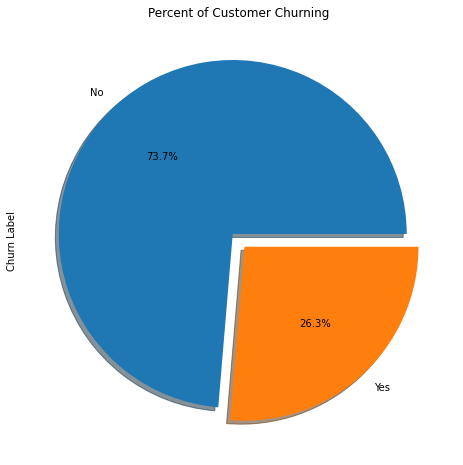

In [25]:
# Plot a piechart showing the percentage of customer that churn
train['Churn Label'].value_counts().plot.pie(explode=[0.05, 0.05], autopct = '%1.1f%%', shadow=True, figsize=(10,8));
plt.title("Percent of Customer Churning")

From this visual, it is evident that 27% of customers churned while 73% did not.

## <a id='2.2'>2.2 Analysing Categorical Variables</a>

Before I plot relationships in the categorical variable, I will get a tabular distribution of values in each categorical variable. I want to know how many Males and Females, Senior Citizens and Younger citizens there are

In [26]:
# create a dataframe containing only categorical variables
cat_df = train[['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support','Streaming TV', 'Streaming Movies', 
        'Contract', 'Paperless Billing', 'Payment Method']]

In [27]:
# create empty list object
value_dist = list()
# loop through category data frame and append the counts into list created
for col in cat_df.columns:
    # convert value count series using to_frame and insert it into a list
    value_dist.append(cat_df[col].value_counts().to_frame())

# assign the list into a dataframe    
cat_df1 = pd.DataFrame({'Data values':value_dist})

In [28]:
# increase max column width
pd.options.display.max_colwidth = 300

#check variable
cat_df1

,Data values
0,Gender Male 2862 Female 2763
1,Senior Citizen No 4713 Yes 912
2,Partner No 2913 Yes 2712
3,Dependents No 4337 Yes 1288
4,Phone Service Yes 5075 No 550
5,Multiple Lines No 2697 Yes 2378 No phone service 550
6,Internet Service Fiber optic 2467 DSL 1958 No 1200
7,Online Security No 2798 Yes 1627 No internet service 1200
8,Online Backup No 2483 Yes 1942 No internet service 1200
9,Device Protection No 2484 Yes 1941 No internet service 1200


### <a id='2.2.1'>2.2.1 Analysing Demographics</a>

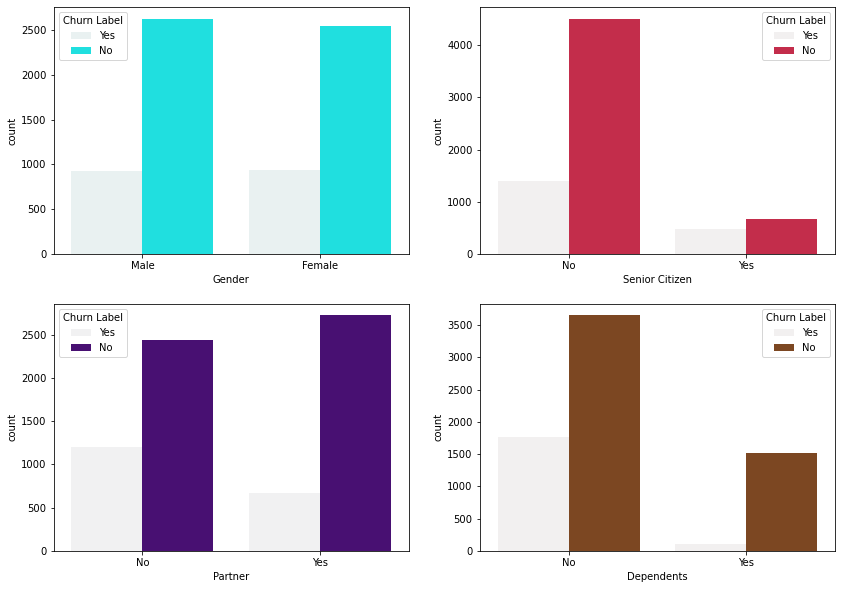

In [29]:
# create fig object subplot number
fig, ax =plt.subplots(nrows=2,ncols=2,figsize=(14,10))

# plot count of Gender, Senior Citizen, Partner, Dependents seperately for both churning and not churning
sns.countplot(x='Gender', hue='Churn Label', data = df, color='aqua', ax=ax[0,0])
sns.countplot(x='Senior Citizen', hue='Churn Label', data = df, color='crimson', ax=ax[0,1])
sns.countplot(x='Partner', hue='Churn Label', data = df, color='indigo', ax=ax[1,0])
sns.countplot(x='Dependents', hue='Churn Label', data = df, color='saddlebrown', ax=ax[1,1])

plt.show() # removes matplot default plot label

**Impact on dependent variable:**
* Male and Female had fairly the same ratio of yes to no in churn Label. So the gender has an insignificant effect on a customer decison to churn
* Less of the customers were senior citizen. Although senior citizens are more likely to churn
* Customers without partners have a higher likelihood of churning.
* Customers without dependents have a higher probability of quiting than those with.

### <a id='2.2.2'>2.2.2 Analysing Choice of Services and Payment information</a>

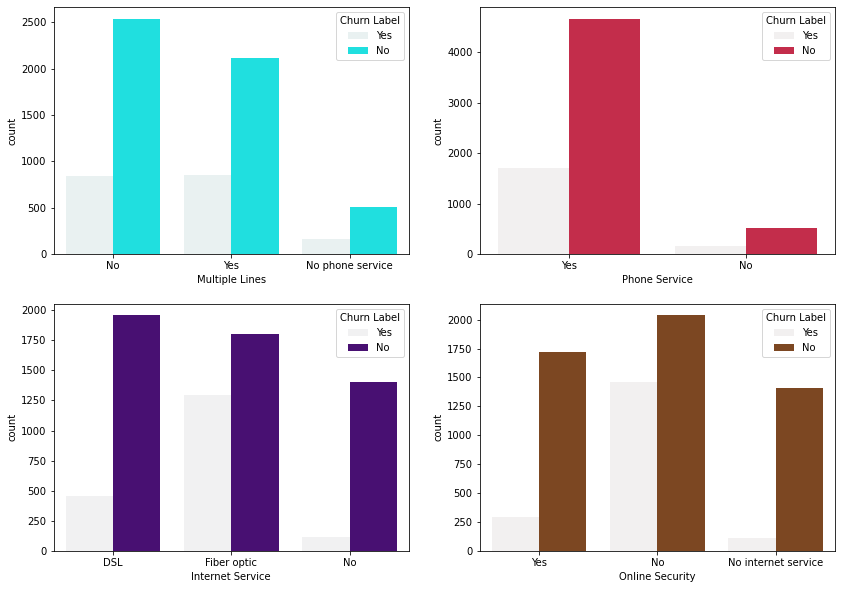

In [30]:
# create fig object subplot number
fig, ax =plt.subplots(nrows=2,ncols=2,figsize=(14,10))

# plot count of Multiple Lines, Phone Service, Internet Service, Online Security seperately for yes and no churn label
sns.countplot(x='Multiple Lines', hue='Churn Label',data = df,color='aqua',ax=ax[0,0])
sns.countplot(x='Phone Service', hue='Churn Label',data = df,color='crimson',ax=ax[0,1])
sns.countplot(x='Internet Service', hue='Churn Label',data = df,color='indigo',ax=ax[1,0])
sns.countplot(x='Online Security', hue='Churn Label',data = df,color='saddlebrown',ax=ax[1,1])

plt.show() # removes matplot default plot label

**Impact on dependent variable:**
* Both customers with multiple phone services and no phone services are more likely to churn. But logically, why would a customer get multiple phone service if he is not satisfied with the service. Perhaps, they could be churning beacuse of cost, or bad customer service. Further exploration may diclose more insight on this.
* More customers opted for phone services. But the ratio of churn to not churn in both option is fairly the same. This feature probably has a small impact on the dependent variable.
* Fibre optic users have a higher likelihood of churning.
* Customers without online security are more likely to churn.

**Relationship:**
* The **No** in Phone Service plot is exactly the same as **No phone service** in Multiple Lines
* Also, the **No** in Internet Service is exactly the same as **No internet service** in Online Security and this makes sense beacuse costumer without internet service will definitely fall under the no internet service category in Online security. Similar is the case in the first relationship

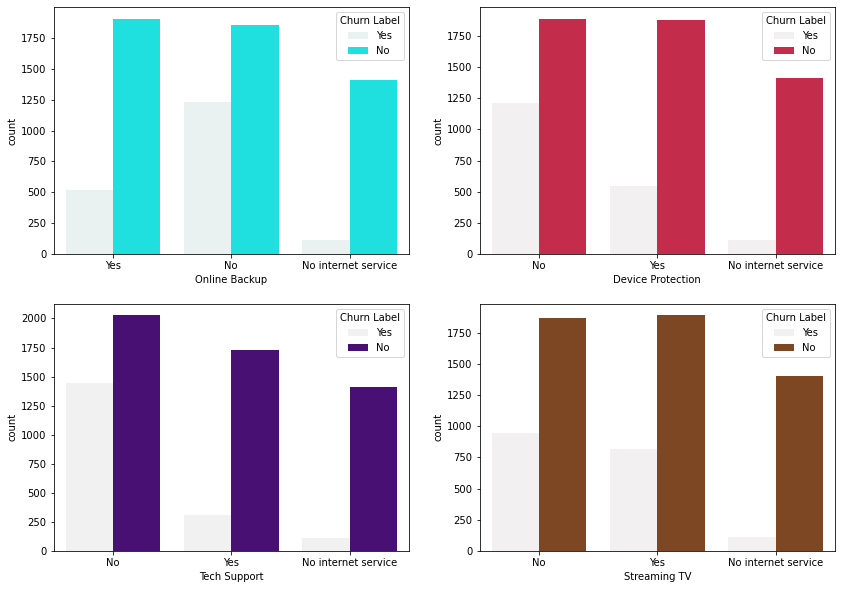

In [31]:
# create fig object subplot number
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14,10))

# plot count of Online Backup, Device Protection, Tech Support, Streaming TV seperately for yes and no churn label
sns.countplot(x='Online Backup', hue='Churn Label', data = df, color='aqua', ax=ax[0,0],)
sns.countplot(x='Device Protection', hue='Churn Label', data = df, color='crimson', ax=ax[0,1])
sns.countplot(x='Tech Support', hue='Churn Label', data = df, color='indigo', ax=ax[1,0])
sns.countplot(x='Streaming TV', hue='Churn Label', data = df, color='saddlebrown', ax=ax[1,1])

plt.show() # removes matplot default plot label

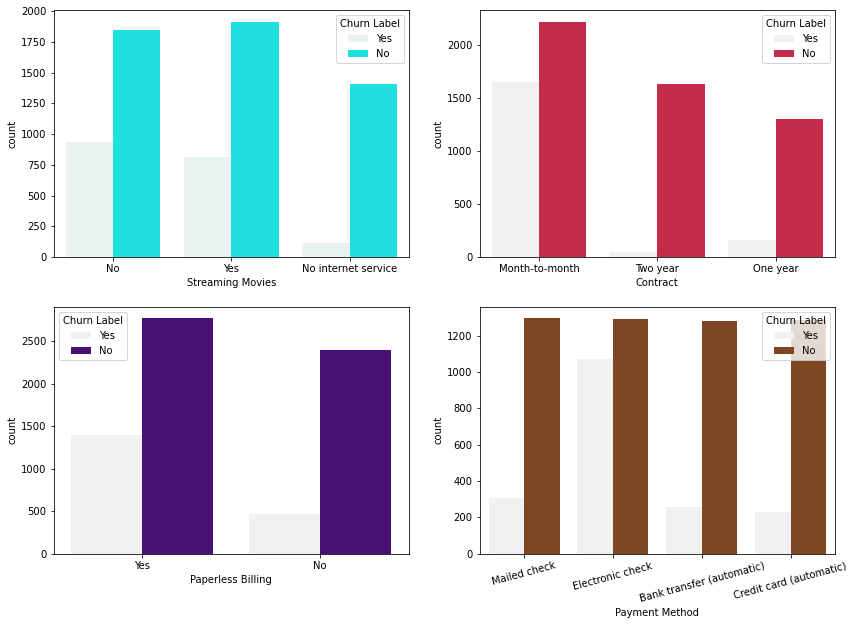

In [32]:
# create fig object subplot number
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14,10))

# plot count of Online Backup, Device Protection, Tech Support, Streaming TV seperately for yes and no churn label
sns.countplot(x='Streaming Movies', hue='Churn Label', data = df, color='aqua', ax=ax[0,0],)
sns.countplot(x='Contract', hue='Churn Label', data = df, color='crimson', ax=ax[0,1])
sns.countplot(x='Paperless Billing', hue='Churn Label', data = df, color='indigo', ax=ax[1,0])
sns.countplot(x='Payment Method', hue='Churn Label', data = df, color='saddlebrown', ax=ax[1,1])

plt.xticks(rotation=15) # rotates x label so there is enough space
plt.show() # removes matplot default plot label

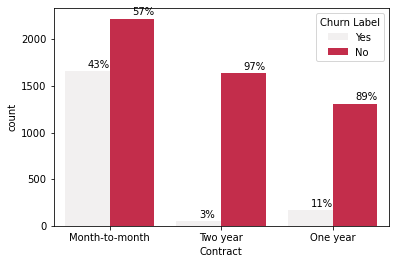

In [34]:
ax = sns.countplot(x='Contract', hue='Churn Label', data = df, color='crimson')
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r
    
    ax.text(left.get_x() + left.get_width()/2, left.get_height()+40, '{0:.0%}'.format(height_l/total))
    ax.text(right.get_x() + right.get_width()/2, right.get_height()+40, '{0:.0%}'.format(height_r/total))

**Impact on dependent variable:**
* Customers without online back up, device protection, tech support, streaming tv, and streaming tv are more likely to churn
* Customers on month-to-month are more likely to churn and this is realistic because they are free to leave at the end of every month compared to customers with 1 year/ 2 years who would leave after this durations.
* Customers using Electronic check as payment method are more likely to churn.

**Relationship:**
* The **No internet service** in online back up, device protection, tech support, streaming tv, and streaming tv all have the same counts which is also similar to the **No** category in Internet Service

During this exploaration, I would need to check for the correlation of this categories with strong relationships. 

### <a id='2.2.3'>2.2.3 Analysing Churn Reason</a>

<AxesSubplot:xlabel='count', ylabel='Churn Reason'>

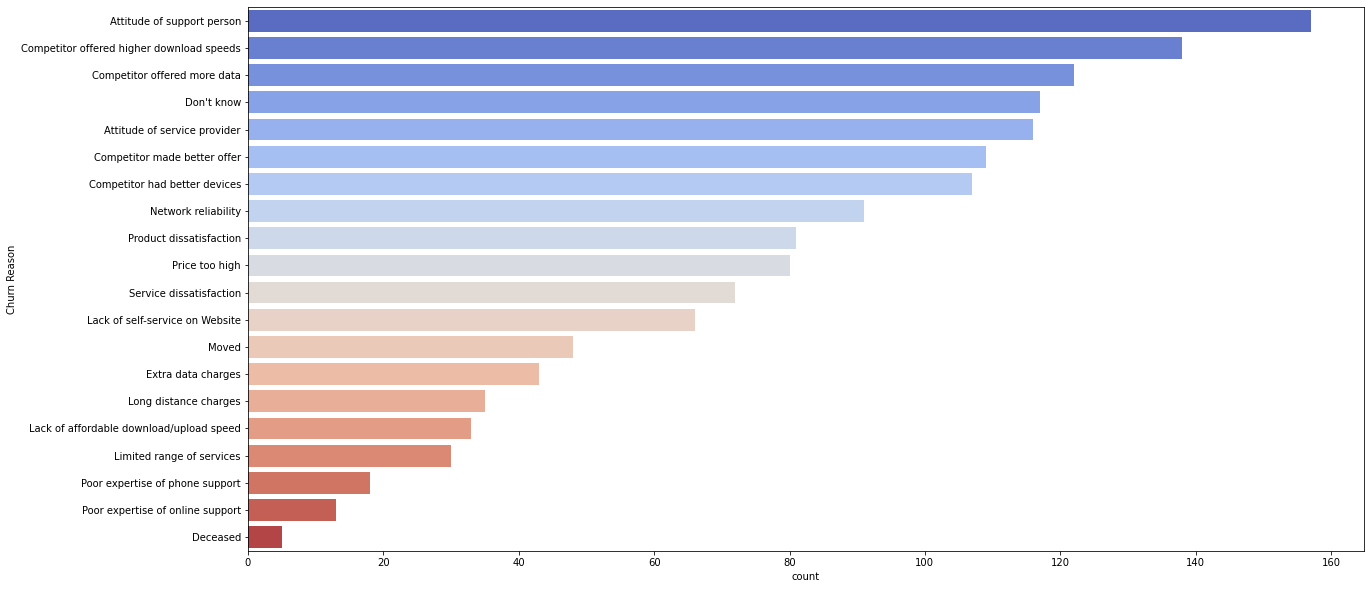

In [46]:
# create figure object and set plot size
fig = plt.figure(figsize=(20,10))
# Plot count of Churn Reason 20 unique values
sns.countplot(y= "Churn Reason", data=train, palette="coolwarm", order= train["Churn Reason"].value_counts().index)

A significant majority of customers churned as result of poor customer service and more attractive offer from competitor

## <a id='2.3'>2.3 Analysing Numerical Variables</a>

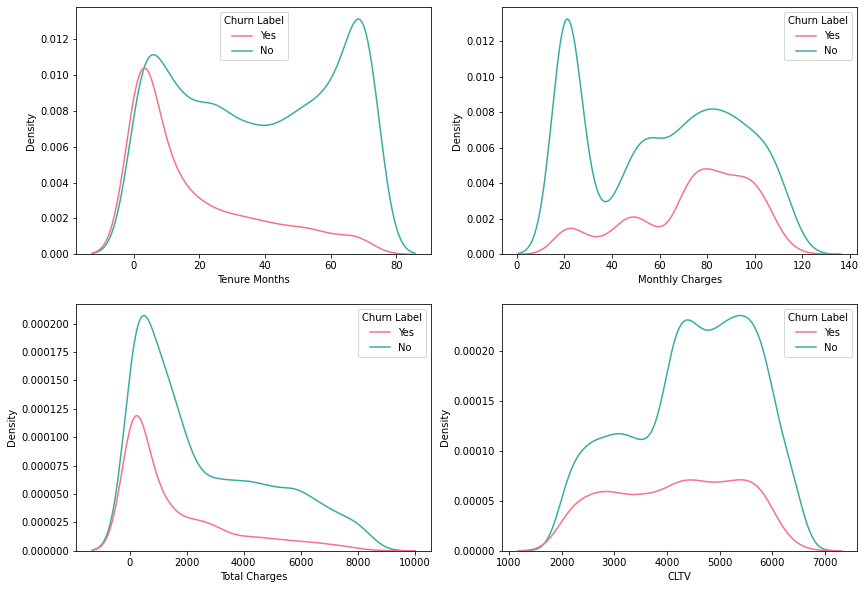

In [141]:
# create fig object and subplot number
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14,10))

# plot distributuion of Tenure Months, Monthly Charges, Total Charges, CLTV 
sns.kdeplot(x='Tenure Months', hue='Churn Label', data=train, palette ="husl", ax=ax[0,0])
sns.kdeplot(x='Monthly Charges', hue='Churn Label', data=train, palette ="husl", ax=ax[0,1])
sns.kdeplot(x='Total Charges', hue='Churn Label', data=train, palette ="husl", ax=ax[1,0])
sns.kdeplot(x='CLTV', hue='Churn Label', data=train, palette ="husl", ax=ax[1,1])

plt.show() # removes matplot default plot label

* Most customers churned during the first few months of their tenure. Therefore, the longer the tenure, the less likely the customer churns
* Customers with monthly pay around 80-100 churned more
* The Total Charges curve and Tenure month for churned customers have a very similar shape, and this makes sense because the Total Charges value is approximately the product of the tenure months and monthly charges. I suspect high correlation but I would inspect further
* The highest value customers didn't churn which is great for business

<AxesSubplot:xlabel='Churn Score', ylabel='Density'>

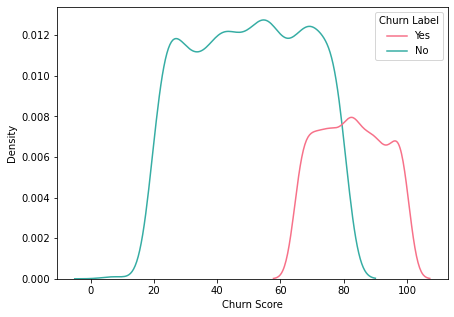

In [142]:
# create fig object and set size
fig = plt.figure(figsize=(7,5))
# plot distributuion of Churn score
sns.kdeplot(x='Churn Score', hue='Churn Label', data=train, palette ="husl")

This churn score feature looks like a very promising predictor as customers with churn score above 90 are guaranteed to churn

## <a id='2.4'>2.4 Dealing with Outliers</a>

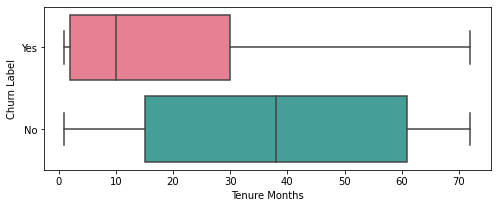

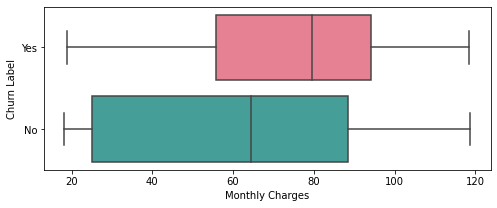

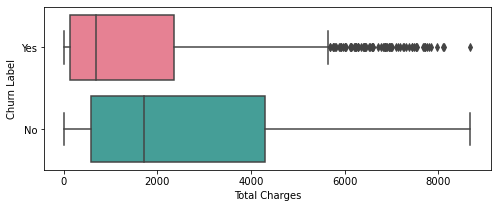

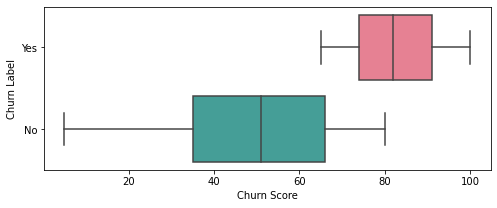

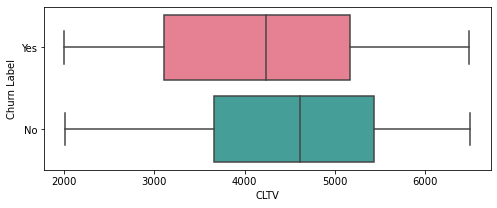

In [143]:
# create a list of all numerical variables
num_var = ['Tenure Months', 'Monthly Charges', 'Total Charges', 'Churn Score', 'CLTV']
# loop thought the list and plot a boxplot for each to check for outliers
for col in num_var:
    fig = plt.figure(figsize=(8,3)) #set plot size
    sns.boxplot(data = train, x = col, y = 'Churn Label', palette = 'husl')

* There are some outliers in the the tenure months, so I would investigate it further 
* There are many outliers in the Total Charges feature but  removing this value may cause underfitting as it will fail to capture some important relationships. I would ignore this for now and see how the model performs

In [144]:
# count number of outlier when churn label is yes and tenure months is greater that 70
sum((train['Churn Label'] == 'Yes') & (train['Tenure Months'] > 70))

10

There are 7 outliers here, lets investigate further

In [145]:
# view dataset for the outliersin Tenure Months with a transpose
train[(train['Churn Label'] == 'Yes') & (train['Tenure Months'] > 70)].T

,248,1691,901,1696,815,1182,1026,1662,1206,1509
Gender,Male,Male,Male,Female,Male,Female,Female,Female,Male,Male
Senior Citizen,No,No,Yes,No,No,Yes,No,No,No,Yes
Partner,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
Dependents,No,No,No,No,No,No,No,No,No,No
Tenure Months,71,71,72,72,72,72,72,71,72,71
Phone Service,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes
Multiple Lines,Yes,Yes,Yes,No phone service,Yes,Yes,Yes,Yes,Yes,Yes
Internet Service,Fiber optic,Fiber optic,Fiber optic,DSL,Fiber optic,DSL,Fiber optic,Fiber optic,Fiber optic,Fiber optic
Online Security,Yes,No,No,No,No,Yes,No,No,Yes,Yes
Online Backup,No,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes


The 7 outliers in this tenure is not so far from the range. Also, all the customers here churned. I believe this may be really important for the model so I would also keep this records and inspect how well my model performs

## <a id='2.5'>2.5 Collinearity in numerical variables</a>

<AxesSubplot:>

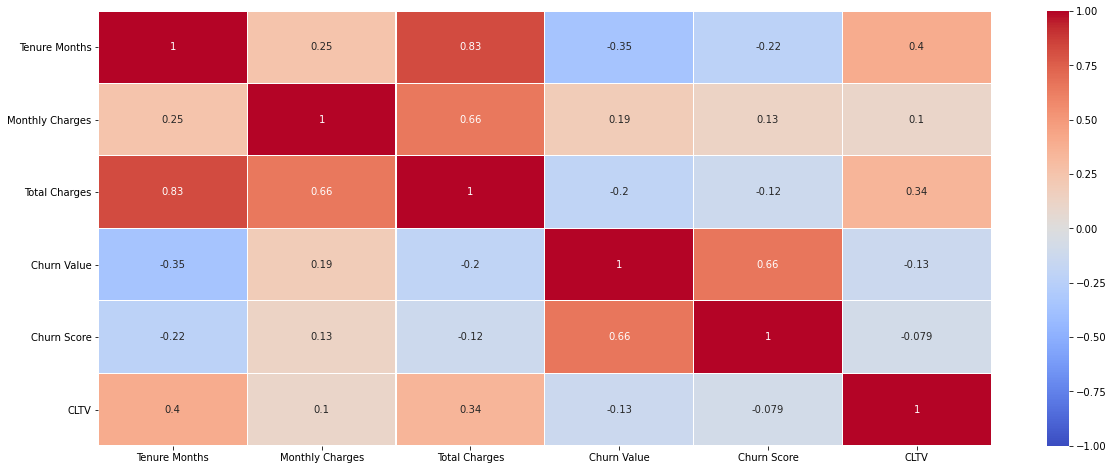

In [146]:
# set plot size
plt.figure(figsize=(20, 8))

#create correlation data frame
corr = train.corr()

# plot heat map of correlation data frame
sns.heatmap(corr, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

For this analysis, my correlation threshold is 0.7, thus anything above that would stand as highly correlated

Tenure Months and Total Charges features are highly correlated, having a correlation of 0.81. To avoid overfitting, I would drop one of these features, specifically the feature with a lower impact on the dependent variable (Churn value, Churn label)

However, I would not drop this column right now because I intend to check my model performance multicollinearity is not accounted for. 

In [147]:
#dropping churn reason and churn label since EDA has been completed
train = train.drop(['Churn Label', 'Churn Reason'], axis=1)
test = test.drop(['Churn Label', 'Churn Reason'], axis=1)

# <a id='3'>3 Data Preprocessing</a>


I would also like to see how my categorical features relate to each other and how strong the correlation between them is. But since this features contain string values for most of the columns, I would have to pre-process them before I can analyse them together.


## <a id='3.1'>3.1 One Hot Encoding</a>

In [148]:
# create list of categorical variables
cat_var = ['Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Phone Service',
       'Multiple Lines', 'Internet Service',
       'Online Backup', 'Tech Support', 'Streaming Movies',
       'Paperless Billing', 'Payment Method','Contract','Online Security', 'Streaming TV' , 'Device Protection']

# one hot encoding on both train and test dataset
train_enc = pd.get_dummies(train, columns=cat_var, drop_first=True)
test_enc = pd.get_dummies(test, columns=cat_var, drop_first=True)

In [149]:
# check shape after encoding
print(train_enc.shape)
print(test_enc.shape)
# No of column increased as expected

(5625, 33)
(1407, 33)


Now, lets check for collinearity in this categorical variables

<AxesSubplot:>

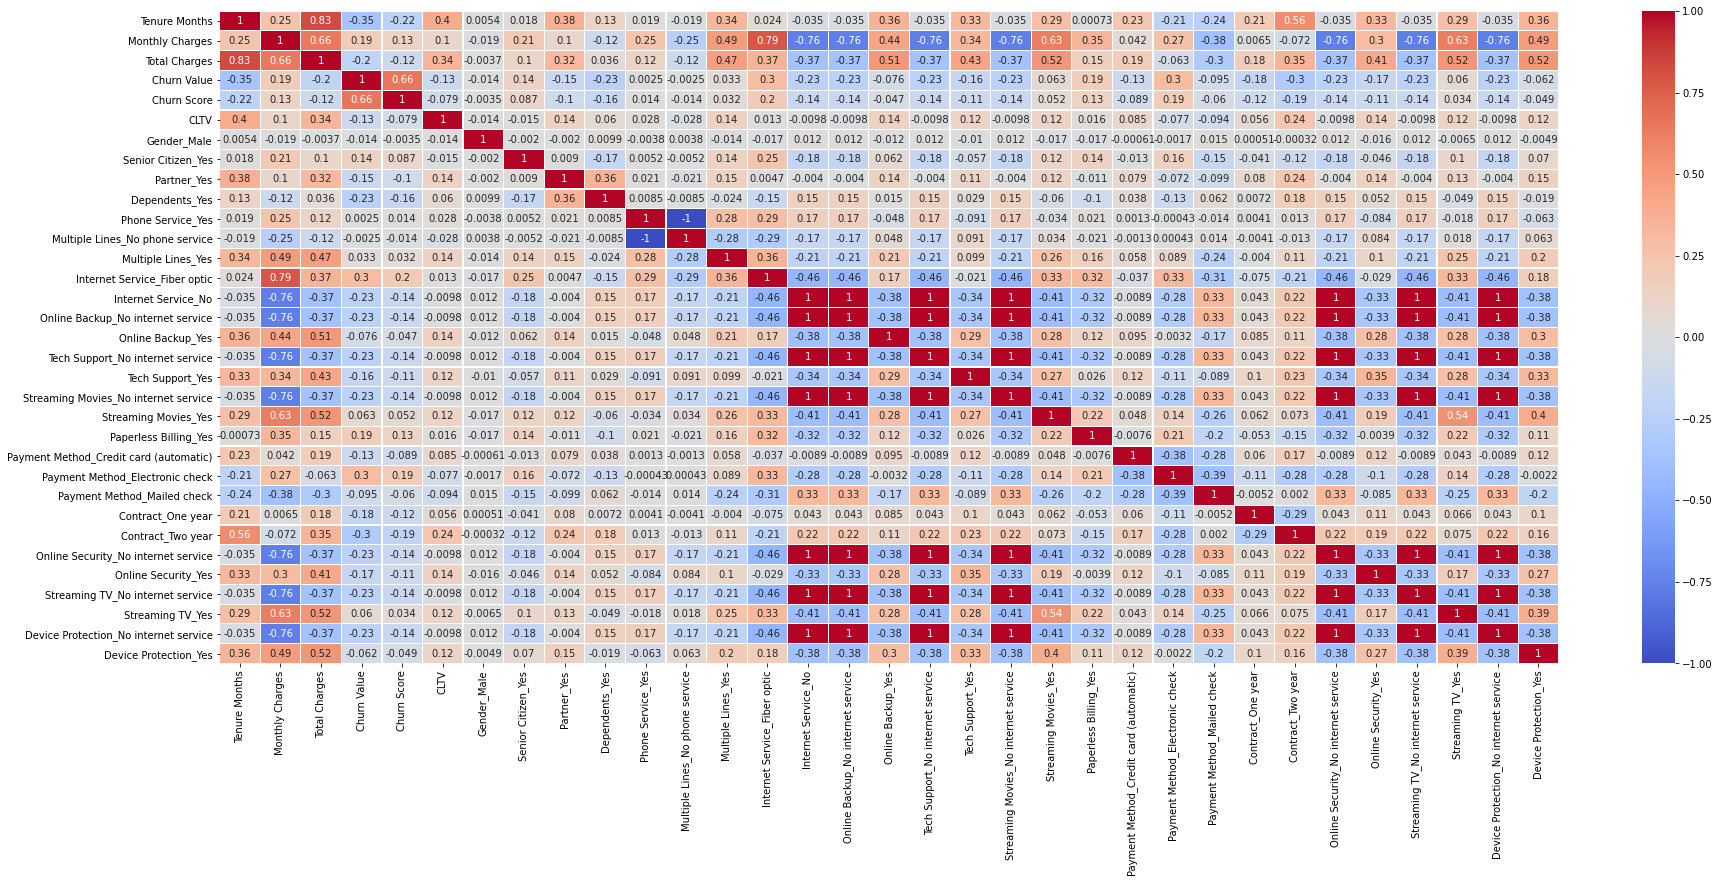

In [150]:
# set plot size
plt.figure(figsize=(30, 12))

#create correlation data frame
corr = train_enc.corr()

# plot heat map of correlation data frame
sns.heatmap(corr, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

There are many ones, meaning those columns are exactly the same thing, which brings me back to my observation during the EDA, when I noticed that:
* Phone Service_Yes == Multiple Lines_No phone service
* Internet Service_No == Online Backup_No internet service = Tech Support_No internet service = Streaming Movies_No internet service = Streaming TV_No internet service = Online Security_No internet service = Device Protection_No internet service

## <a id='3.2'>3.2 Feature Selection</a>

**From this point I would split my dataset into 3 groups:**
1. To account for collinearity
2. To account for collinearity and excluding Churn score (A premodeled feature)
3. To ignore multicollinearity and use all features

### <a id='3.2.1'>3.2.1 Accounting For Collinearity</a>

To avoid overfitting, I would remove all variables on the right hand side of both relationship and also Total charges that I identified as a high correlated column previously

In [151]:
# droping highly correlated column in both train and test data set and Total Charges
train1 = train_enc.drop(['Total Charges','Phone Service_Yes',
       'Online Backup_No internet service',
       'Tech Support_No internet service',
       'Streaming Movies_No internet service',
       'Online Security_No internet service',
       'Streaming TV_No internet service',
       'Device Protection_No internet service'], axis = 1)

test1 = test_enc.drop(['Total Charges','Phone Service_Yes',
       'Online Backup_No internet service',
       'Tech Support_No internet service',
       'Streaming Movies_No internet service',
       'Online Security_No internet service',
       'Streaming TV_No internet service',
       'Device Protection_No internet service'], axis = 1)

In [152]:
#Split train and test data set into dependent and independent variables
x_train = train1.drop('Churn Value', axis =1)
y_train = train1['Churn Value']

x_test = test1.drop('Churn Value', axis =1)
y_test = test1['Churn Value']

From the EDA, It was clear that the data set was imbalanced, hence I would do oversampling to balance it

In [153]:
# Oversampling but train and test data set
x_train, y_train = SMOTE().fit_resample(x_train, y_train)
x_test, y_test = SMOTE().fit_resample(x_test, y_test)

In [154]:
# check that oversampling was successful using value count on dependent variable
y_train.value_counts()

0    4144
1    4144
Name: Churn Value, dtype: int64

### <a id='3.2.2'>3.2.2 Accounting For Collinearity excluding Churn score</a>

In [155]:
# Remove Churn Score and Split data set into dependent and independent variables
x_train1 = train1.drop(['Churn Value','Churn Score'], axis=1)
y_train1 = train1["Churn Value"]
x_test1 = test1.drop(['Churn Value','Churn Score'], axis=1)
y_test1 = test1['Churn Value']

In [156]:
x_train1.columns

Index(['Tenure Months', 'Monthly Charges', 'CLTV', 'Gender_Male',
       'Senior Citizen_Yes', 'Partner_Yes', 'Dependents_Yes',
       'Multiple Lines_No phone service', 'Multiple Lines_Yes',
       'Internet Service_Fiber optic', 'Internet Service_No',
       'Online Backup_Yes', 'Tech Support_Yes', 'Streaming Movies_Yes',
       'Paperless Billing_Yes', 'Payment Method_Credit card (automatic)',
       'Payment Method_Electronic check', 'Payment Method_Mailed check',
       'Contract_One year', 'Contract_Two year', 'Online Security_Yes',
       'Streaming TV_Yes', 'Device Protection_Yes'],
      dtype='object')

From the EDA, It was clear that the data set was imbalanced, hence I would do oversampling to balance it

In [157]:
# Oversampling but train and test data set
x_train1, y_train1 = SMOTE().fit_resample(x_train1, y_train1)
x_test1, y_test1 = SMOTE().fit_resample(x_test1, y_test1)

### <a id='3.2.3'>3.2.3 Ignoring multicolinearity and using all features</a>

In [158]:
#Split train and test data set into dependent and independent variables
x_train2 = train_enc.drop('Churn Value', axis =1)
y_train2 = train_enc['Churn Value']

x_test2 = test_enc.drop('Churn Value', axis =1)
y_test2 = test_enc['Churn Value']

In [159]:
x_train2.shape

(5625, 32)

From the EDA, It was clear that the data set was imbalanced, hence I would do oversampling to balance it

In [160]:
# Oversampling but train and test data set
x_train2, y_train2 = SMOTE().fit_resample(x_train2, y_train2)
x_test2, y_test2 = SMOTE().fit_resample(x_test2, y_test2)

## <a id='3.3'>3.3 Feature Scaling</a>

VARIABLE GROUPS:
* Accounting for colinearity - x_train, y_train, x_test, y_test
* Accounting for collinearity and excluding churn score - x_train1, y_train1, x_test1, y_test1
* Ignoring multicolinearity - x_train2, y_train2, x_test2, y_test2

In [161]:
# creating scaler object
scaler = MinMaxScaler()

In [162]:
# scaling the independent variables for train and test in all groups

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

x_train1 = scaler.fit_transform(x_train1)
x_test1 = scaler.transform(x_test1)

x_train2 = scaler.fit_transform(x_train2)
x_test2 = scaler.transform(x_test2)

# <a id='4'>4. Model Building</a>

In this section, I would train and test several models but let's begin the simplest classifier (Logistic Regression Classifier)
and test it on each of our feature selection. After this, I would try other model such as Ramdon Forest classifier, Desion tree classifier, SVG and KNN.

Before I proceed, let me do a baseline model to get an idea of what score to expect

## <a id='4.1'>4.1 Baseline Model Method</a>

For this, we would use the original imbalance dataset
* precision = tp/(tp+fp)
* recall = tp/(tp+fn)
* fi_score = 2(precision)(recall)/(precision+recall)

In [163]:
# get value count of dependent variable
train['Churn Value'].value_counts()

0    4144
1    1481
Name: Churn Value, dtype: int64

In [164]:
# for not churning => 0
base_precision =  4106 / (4106 + 1519)
base_recall = 4106 / 4106
base_f1 = 2 * (base_precision * base_recall) / (base_precision + base_recall)

# for churning => 1
base_precision_1 = 1519 / (4106+1519)
base_recall_1 = 1519 / 1519
base_f1_1 = 2 * (base_precision_1 * base_recall_1) / (base_precision_1 + base_recall_1)

In [165]:
# print avg f1 score
print(f' Avg of f1score of our baseline model is {(base_f1 + base_f1_1)/2}')

 Avg of f1score of our baseline model is 0.6345764474210691


**From this, any model's f1 score below 0.6345 translates to a poor performing model**

## <a id='4.2'> 4.2 Logistic Regression</a>

let's test logistic regression on each feature selection

### <a id='4.2.1'>4.2.1 Logistic regression model accounting for collinearity</a>

In [166]:
# call logistic regression object with random state of 1 
lr = LogisticRegression(random_state=1)

In [167]:
# train model with train data set
lr.fit(x_train, y_train)

LogisticRegression(random_state=1)

In [168]:
# predict y values off of x_test
y_pred = lr.predict(x_test)

In [169]:
# print evaluation metrics
col_accuracy = accuracy_score(y_test, y_pred)
print(col_accuracy)
print(classification_report(y_test, y_pred))
col_cmatrix = confusion_matrix(y_test, y_pred)
print(col_cmatrix)

0.936702649656526
              precision    recall  f1-score   support

           0       0.96      0.91      0.94      1019
           1       0.92      0.96      0.94      1019

    accuracy                           0.94      2038
   macro avg       0.94      0.94      0.94      2038
weighted avg       0.94      0.94      0.94      2038

[[931  88]
 [ 41 978]]


In [170]:
#store f1 score in col_f1 and call
col_f1 = f1_score(y_test, y_pred)
col_f1

0.9381294964028776

This is really high, but lets check others and compare

### <a id='4.2.2'>4.2.2 Logistic regression data accounting for collinearity without churn Score</a>

In [171]:
# create lr object
lr1 = LogisticRegression(random_state = 1)

In [172]:
# train lr algorithm with x_train1 and y_train1
lr1.fit(x_train1, y_train1)

LogisticRegression(random_state=1)

In [173]:
# predict y values off of x_test1
y_pred = lr1.predict(x_test1)

In [174]:
# print evaluation metrics
print(accuracy_score(y_test1, y_pred))
print(classification_report(y_test1, y_pred))
print(confusion_matrix(y_test1, y_pred))

0.8478900883218842
              precision    recall  f1-score   support

           0       0.88      0.81      0.84      1019
           1       0.82      0.89      0.85      1019

    accuracy                           0.85      2038
   macro avg       0.85      0.85      0.85      2038
weighted avg       0.85      0.85      0.85      2038

[[823 196]
 [114 905]]


In [175]:
#store f1 score in col2_f1 and call
col2_f1 = f1_score(y_test1, y_pred)
col2_f1

0.8537735849056604

It seems like churn score feature absence had a big effect on the f1_score as it dropped to 0.8505

### <a id='4.2.3'>4.2.3 Logistic regression model without accounting for collinearity</a>

In [176]:
# create lr object
lr2 = LogisticRegression(random_state = 1)

In [177]:
# train lr algorithm with x_train2 and y_train2
lr2.fit(x_train2, y_train2)

LogisticRegression(random_state=1)

In [178]:
# predict y values off of x_test2
y_pred = lr2.predict(x_test2)

In [179]:
# print evaluation metrics
print(accuracy_score(y_test2, y_pred))
print(classification_report(y_test2, y_pred))
print(confusion_matrix(y_test2, y_pred))

0.9376840039254171
              precision    recall  f1-score   support

           0       0.95      0.92      0.94      1019
           1       0.92      0.95      0.94      1019

    accuracy                           0.94      2038
   macro avg       0.94      0.94      0.94      2038
weighted avg       0.94      0.94      0.94      2038

[[938  81]
 [ 46 973]]


In [180]:
#store f1 score in col3_f1 and call
col3_f1 = f1_score(y_test1, y_pred)
col3_f1

0.9387361312108057

Let insert all f1_score into pandas for easier comparison

In [181]:
# store all f1 scores for feature selections in a pandas series
f1_scores = pd.Series([col_f1, col2_f1, col3_f1], 
                      index=['f1 score accounting for collinearity',
                            'f1 score accounting for collinearity but excluding churn score',
                             'f1 score without accounting for collinearity'])
f1_scores

f1 score accounting for collinearity                              0.938129
f1 score accounting for collinearity but excluding churn score    0.853774
f1 score without accounting for collinearity                      0.938736
dtype: float64

The one without Churn score is the lowest, this says that churn score is a very important feature in this model. Although the f1 score without feature selection is the highest, it is just by a little margin and realistically its better to choose one with feature selection

so I would testing other models with the feature selection accounting for multicollinearity

## <a id='4.3'>4.3 Random Forest</a>

In [182]:
#create random forest object
rf = RandomForestClassifier()

In [183]:
# train  dependent and independent variables
rf.fit(x_train, y_train)

RandomForestClassifier()

In [184]:
# predict y off of x_test
y_hat = rf.predict(x_test)

In [185]:
# get evaluation metrics
rf_accuracy = accuracy_score(y_test, y_hat)
print(rf_accuracy)
print(classification_report(y_test, y_hat))
rf_cmatrix = confusion_matrix(y_test, y_hat)
print(rf_cmatrix)

0.9455348380765456
              precision    recall  f1-score   support

           0       0.96      0.93      0.94      1019
           1       0.93      0.97      0.95      1019

    accuracy                           0.95      2038
   macro avg       0.95      0.95      0.95      2038
weighted avg       0.95      0.95      0.95      2038

[[943  76]
 [ 35 984]]


In [186]:
#store f1 score in rf_f1 and call
rf_f1 = f1_score(y_test1, y_hat)
rf_f1

0.9466089466089466

This is just slightly higher than the logistic regression f1 score

## <a id='4.4'>4.4 Decision Tree</a>

In [187]:
#create decison tree object
dt = DecisionTreeClassifier()

In [188]:
# train both variables into algorithm
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [189]:
# predict off of x_test
y_hat = dt.predict(x_test)

In [190]:
# get evaluation metrics
dt_accuracy = accuracy_score(y_test, y_hat)
print(dt_accuracy)
print(classification_report(y_test, y_hat))
dt_cmatrix = confusion_matrix(y_test, y_hat)
print(dt_cmatrix)

0.9180569185475956
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1019
           1       0.92      0.92      0.92      1019

    accuracy                           0.92      2038
   macro avg       0.92      0.92      0.92      2038
weighted avg       0.92      0.92      0.92      2038

[[934  85]
 [ 82 937]]


In [191]:
#store f1 score in dt_f1 and call
dt_f1 = f1_score(y_test1, y_pred)
dt_f1

0.9387361312108057

## <a id='4.5'>4.5 Support Vector Classifier</a>

In [192]:
#create svc object
svm = SVC()

In [193]:
# train data in model
svm.fit(x_train, y_train)

SVC()

In [194]:
# predict y values off of x
y_hat = svm.predict(x_test)

In [195]:
# get evaluation metrics
svm_accuracy = accuracy_score(y_test, y_hat)
print(svm_accuracy)
print(classification_report(y_test, y_hat))
svm_cmatrix = confusion_matrix(y_test, y_hat)
print(svm_cmatrix)

0.9425907752698724
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1019
           1       0.93      0.96      0.94      1019

    accuracy                           0.94      2038
   macro avg       0.94      0.94      0.94      2038
weighted avg       0.94      0.94      0.94      2038

[[941  78]
 [ 39 980]]


In [196]:
#store f1 score in dt_f1 and call
svm_f1 = f1_score(y_test, y_hat)
svm_f1

0.9436687530091478

The svg model pefromance is withing the same range

## <a id='4.6'>4.6 K-Nearest Neighbor</a>

In [197]:
# create knn object
knn = KNeighborsClassifier(n_neighbors = 3)

In [198]:
#train knn model with dataset
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [199]:
# predict off of x_test
y_hat = knn.predict(x_test)

In [200]:
# get evaluation metrics
knn_accuracy = accuracy_score(y_test, y_hat)
print(knn_accuracy)
print(classification_report(y_test, y_hat))
knn_cmatrix = confusion_matrix(y_test, y_hat)
print(knn_cmatrix)

0.8380765456329735
              precision    recall  f1-score   support

           0       0.87      0.80      0.83      1019
           1       0.81      0.88      0.84      1019

    accuracy                           0.84      2038
   macro avg       0.84      0.84      0.84      2038
weighted avg       0.84      0.84      0.84      2038

[[812 207]
 [123 896]]


In [201]:
#store f1 score in dt_f1 and call
knn_f1 = f1_score(y_test, y_hat)
knn_f1

0.8444863336475023

# <a id='5'>5. Model Performance Evaluation</a>

Now that all the models have being train and tested, I can compared and choose the best one. I will also do a hyper-parameter tuning on the best model.

To assess these models performances, I am going to analyse the following things:
* f1 score: The harmonic mean of the model's precision and recall and this is my main basis for evaluation
* accuracy score: the ratio of correct predictions to total number of observation
* Confusion matrix: matrix of True positive, False positive, True Negative and False Negative
* Recall vs Precision: In this problem, we are more interested on predicting the customers who may churn. For us a False Negative is more dangerous than a False Positive and hence in case of tough competition in terms of other metrics we may choose a model with higher recall at the cost of precision.    

## <a id='5.1'>5.1 F1 Score</a>

In [202]:
#create a pandas series containing all models f1 score
model_f1 = pd.Series([col_f1, rf_f1, dt_f1, svm_f1, knn_f1], 
                     index=['Logistic Regression', 'Random Forest', 'Decision Tree', 'Support Vector Classifier',
                           'K-Nearest Neighbor'])
# call model_f1
model_f1

Logistic Regression          0.938129
Random Forest                0.946609
Decision Tree                0.938736
Support Vector Classifier    0.943669
K-Nearest Neighbor           0.844486
dtype: float64

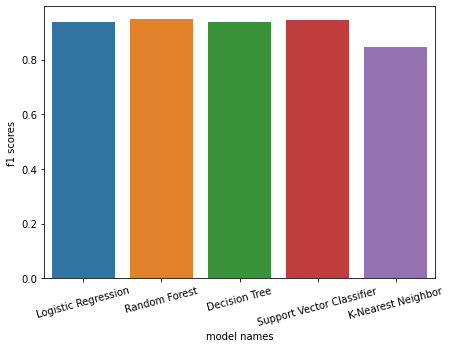

In [203]:
# create fig object
fig,ax=plt.subplots(figsize=(7,5))
# plot barchart of f1scores
sns.barplot(x=model_f1.index, y=model_f1 ,ax=ax)
plt.xlabel('model names') #add ylabel
plt.ylabel('f1 scores') # add xlabel
plt.xticks(rotation=15) #rotate xlabels to fit
plt.show()

From the pandas series and bar displayed, Random forest classifier was the best performing model with a f1_score of 0.946 while
k-nearest neighbour was the worst performing model with a f1_score of 0.844. To trying to check if a highest can be gotten we would do the hyper-parameter tunning on the random forest model

## <a id='5.2'>5.2 Accuracy Score</a>

In [204]:
#create a pandas series containing all models accuracy score
model_accuracy = pd.Series([col_accuracy, rf_accuracy, dt_accuracy, svm_accuracy, knn_accuracy], 
                     index=['Logistic Regression', 'Random Forest', 'Decision Tree', 'Support Vector Classifier',
                           'K-Nearest Neighbor'])
# call model_accuracy
model_accuracy

Logistic Regression          0.936703
Random Forest                0.945535
Decision Tree                0.918057
Support Vector Classifier    0.942591
K-Nearest Neighbor           0.838077
dtype: float64

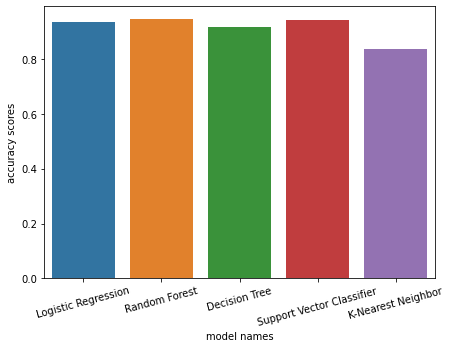

In [205]:
# create fig object
fig,ax=plt.subplots(figsize=(7,5))
# plot barchart of accuracy
sns.barplot(x=model_accuracy.index, y=model_accuracy ,ax=ax)
plt.xlabel('model names')#add xlabel
plt.ylabel('accuracy scores') #add ylabel
plt.xticks(rotation=15) #rotate to fit values
plt.show()

Again the random forest had the highest accuracy while K-nearest neighbor had the lowest

## <a id='5.3'>5.3 Confusion Matrix </a>

In [206]:
#Print the confusion matrix for all models for easy comparison
print('Logistic Regression model confusion matrix')
print(col_cmatrix)
print('\n')
print('Random Forest model confusion matrix')
print(rf_cmatrix)
print('\n')
print('Decision Tree  model confusion matrix')
print(dt_cmatrix)
print('\n')
print('Support Vector Classifier model confusion matrix')
print(svm_cmatrix)
print('\n')
print('K-nearest neighbor model confusion matrix')
print(knn_cmatrix)

Logistic Regression model confusion matrix
[[931  88]
 [ 41 978]]


Random Forest model confusion matrix
[[943  76]
 [ 35 984]]


Decision Tree  model confusion matrix
[[934  85]
 [ 82 937]]


Support Vector Classifier model confusion matrix
[[941  78]
 [ 39 980]]


K-nearest neighbor model confusion matrix
[[812 207]
 [123 896]]


Random Forest also had the lowest False Negative with a value of 35, For this evaluation it is the best model because that maximizes the recall

## <a id='5.4'>5.4 Hyper parameter Tuning </a>

In [207]:
# declaring an object for the classifier
crf = RandomForestClassifier()

In [208]:
# set hyper parameters
aram_grid = {'max_depth': [7, 15],
             'n_estimators': [500, 1000],
             'random_state': [7,10],
             'min_samples_split': [5]}

In [209]:
# grid search estimator
grid = GridSearchCV(crf, param_grid=param_grid,
                   cv=5, scoring='accuracy',
                   return_train_score=True)

In [210]:
#train grid
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [7, 15], 'min_samples_split': [5],
                         'n_estimators': [500, 1000], 'random_state': [7, 10]},
             return_train_score=True, scoring='accuracy')

In [211]:
# get best score
grid.best_score_

0.9449849416118917

In [212]:
# get best hyper parameter estimator
grid.best_estimator_

RandomForestClassifier(max_depth=15, min_samples_split=5, n_estimators=500,
                       random_state=7)

In [213]:
print(f'After hyper-parameter tuning the accuracy increases to {grid.best_score_}')

After hyper-parameter tuning the accuracy increases to 0.9449849416118917


The hyper-parameter tuning didnt improve the score too much, but to the fair the score pretty high already

# <a id='6'>6.Conclusion and Recommendation</a>

## <a id='6.1'>6.1 Conclusion </a>

* Overall, all models performed well with the exception of K-Nearest Neighbor, but the best result came from the random tree classifer. 
* The churn score had a high impact on the model
* Multicollinearity in this case did not affect the model's performance negatively
* During analysis, it was discovered that the company has a customer service problem
* With the current system in place there is a 27% chance of customers churing
* Customers with fiber optic service as home Internet, are more likely to churn.
* Absence of Tech Support is leading to more churns than overall as of all the churns 77.4% didn’t have tech support.
* People with Device protection plan can be considered as low risk.
* Customers who have been with the company longer are on average paying more every month and are less likely to churn.
* People who joined less than 1 year ago are at highest risk customers as 47% of them have left within first year of joining.
* Competitors offer better deals and are causing many customers to churn

## <a id='6.1'>6.1 Recommendation </a>

Having analyzed and developed a customer churn prediction model, I have some recommendation:
* The company gives a long term attractive deal to new customer thereby reducing their likelihood of churning
* The company improves their customer serivice sector
* The company improves its fibre optics service as a many customer with that service churn
* The company offer discounted offer for tech support because a significant majority of customers enjoyed this service

For better analysis and to build a better model, I recommend that:
* The company gives more information about the customer with missing value in total charges
* The company gathers more data to help us imporve the model
* The company gathers data on date, this can help the model predict periods when many customers leave 